# Выполнил: Хромов Александр Эдуардович
# Группа: 3821Б1ПР2 

# Задача 11. Аппроксимация данных. Радиоактивный распад

https://web.lemoyne.edu/giunta/classicalcs/rutherhalf.html

Закон радиоактивного распада, открытый Э.Резерфрдом и Ф.Содди, утверждает, что активность радиоактивного вещества 
уменьшается во времени по экспоненциальному закону (геометрической прогресии). Таким образов, активность такого вещества можно характеризовать *периодом полураспада* – промежутком временем, в течении которого активность уменьшается в $2$ раза.
Здесь мы приводим данные, опубликованные в работе [Rutherford E. A Radioactive Substance emitted from Thorium Compounds // Philosophical Magazine. 1900. 49. 1–14]. Из сосуда с торием, был выкачан воздух. В результате была выделена эманация тория (газ радон-220, или торон).
Для измерения ее ионизирующей способности подавалось напряжение 100 В и измерялась сила тока, которая менялась во времени.

```
 Время, с   Сила тока, А
    0          1.00 
   28          0.69
   62          0.51
  118          0.23
  155          0.14
  210          0.067
  272          0.041
  360          0.018
```

* Изобразите данные на графике.
* Восстановите зависимость $y=c e^{\alpha t}$. Воспользуйтесь двумя методами: 
    * логарифмированием сведите задачу к линейной задаче наименьших квадратов,
    * нелинейным методом наименьших квадратов
* Изобразите графики построенных зависимостей.
* Насколько хорошо установленные зависимости приближают данные? Какая из них лучше?
* Определите период полураспада радона-220 и сравните его с данными из интернета. Чем обусловлено расхождение (если оно есть)?

# Ход работы: 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import linalg
from scipy import optimize
%matplotlib inline

Импорт библиотек необходимых для работы.

In [8]:
x = np.array([0, 28, 62, 118, 155, 210, 272, 360])
y = np.array([1.00, 0.69, 0.51, 0.23, 0.14, 0.067, 0.041, 0.018])

Инициализация массивов данных. Массив x - время, y - сила тока.

# 1. Изображение данных на графике при помощи функции plot() .

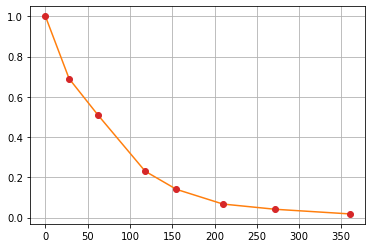

In [12]:
plt.plot(x, y, color='tab:orange')
plt.plot(x, y, 'o', color='tab:red')
plt.grid()
pass

*График 1*

# 2. Восстановление зависимости $y=c e^{\alpha t}$

2.1 *Через линейную задачу наименьших квадратов*

Т.к $y=c e^{\alpha t}$ не линейная функция, при помощи логарифмирования приводим её к линейной форме:

$$
\ln y = \ln c + \alpha t.
$$
Обозначим
$$
y1 = \ln y, \qquad y2 = \ln c.
$$
Теперь зависимость выглядит так:
$$
y1 = y2 + \alpha t.
$$

Затем, при помощи функции polyfit() проводим аппроксимацию данных, а функцией semilogy() отображаем полученные данные на графике:

In [89]:
alpha, y2 = np.polyfit(t, np.log(y), 1)
y2, alpha

(0.23493308938370291, -0.5812246846111059)

In [90]:
c = np.exp(y2)
c

1.2648241357390708

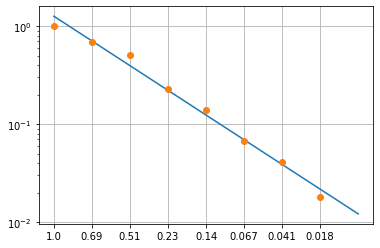

In [91]:
T = len(x)
t = np.arange(T)
c = np.exp(y2)
tt = np.linspace(0, T, 500)
yy = c*np.exp(alpha*tt)
plt.semilogy(tt, yy)
plt.semilogy(t, y, 'o')
plt.grid()
plt.xticks(t[::1], y[::1])

pass

*График 2*

2.2 Аппроксимация данных нелинейным методом

Этот вид аппроксимации реализуется функцией curve_fit(), но перед её использованием необходимо создать функцию, реализующую зависимость

In [92]:
def expg(t, c, alpha):
    return c * np.exp(alpha*t)
params, _ = optimize.curve_fit(exponential_growth, t, y)

In [93]:
c, alpha = params
c, alpha

(1.0333524993007952, -0.4494511400319082)

Значения параметров c отличаются на 0.23, а значения alpha на 0.14

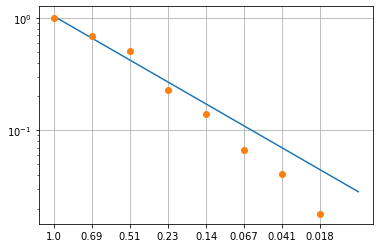

In [94]:
tt = np.linspace(0, T, 500)
yy = expg(tt, c, alpha)
plt.semilogy(tt, yy)
plt.semilogy(t, y, 'o')
plt.grid()
plt.xticks(t[::1], y[::1])

pass

*График 3*

Вывод:

Исходя из графиков 2 и 3, и значений параметров можно сделать вывод, что метод линейной аппроксимации более точен в данной ситуации, т.к он наиболее точно отображает тренд из графика 1.

# 3. Период полураспада

Исходя из определения: "период полураспада – промежуток времени, в течении которого активность вещества уменьшается в  2  раза."

Если активность вещества уменьшится в 2 раза, то и сила тока, проходящего через газ, уменьшится в два раза. Это значит, что согласно таблице с измерениями, период полураспада радона-220 будет равен ~62с.

Согласно Википедии, период полураспада радона-220 равен 55.6с. Разницу в 6,4с можно объяснить тем, что данные из таблицы были получены в 1900-м году. Измерительные приборы и электроника того времени несопоставима с современной, поэтому, можно предположить, что результаты не совпадают именно по этой причине.